Mean Squared Error: 162.9230583134423


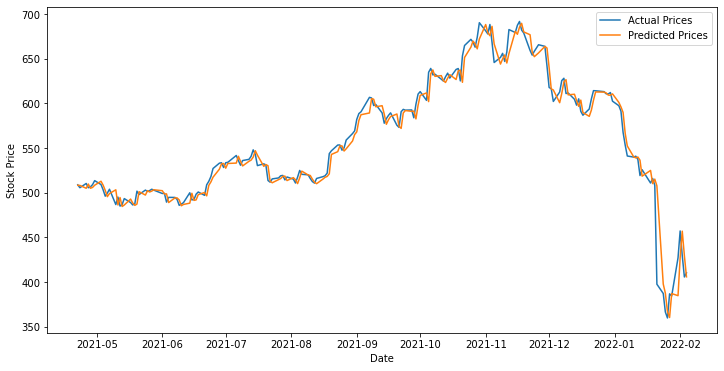

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stock price data 
data = pd.read_excel(r'C:\Users\Dr. Neeta Bisht\Downloads\1729258-1613615-Stock_Price_data_set_(1).xlsx')

# Data preprocessing
data = data[['Date', 'Close']]  # Select only 'Date' and 'Close' columns
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime format

# Create lag features using past stock prices as input features
look_back = 5
for i in range(1, look_back + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Prepare the input features and target variables
X_train, y_train = train_data.drop(['Date', 'Close'], axis=1).values, train_data['Close'].values
X_test, y_test = test_data.drop(['Date', 'Close'], axis=1).values, test_data['Close'].values

# linear regression
def simple_linear_regression(X, y):
    X_mean, y_mean = np.mean(X), np.mean(y)
    numerator = np.dot(X - X_mean, y - y_mean)
    denominator = np.dot(X - X_mean, X - X_mean)
    slope = numerator / denominator
    intercept = y_mean - slope * X_mean
    return slope, intercept

slope, intercept = simple_linear_regression(X_train[:, 0], y_train)

# Make predictions
y_pred = slope * X_test[:, 0] + intercept

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test, label='Actual Prices')
plt.plot(test_data['Date'], y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
